In [72]:


import pandas as pd
import numpy as np
%pylab inline

import seaborn as sns
sns.set(style="ticks",font_scale=1.5,font='Helvetica')
sns.set_palette(sns.hls_palette(8, l=.3, s=.8))


Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


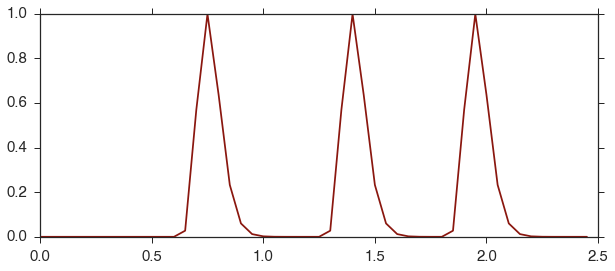

In [73]:

tr = .05

subplots(1,1,figsize=(10,4))
dat = pd.read_csv('scanBOLD.txt',sep=' ')
dat["t"]=np.arange(dat.shape[0])*tr

plot(dat["t"],dat["scan.BOLD"],'-')
show()




In [74]:
mat = np.genfromtxt('mat.txt')

In [75]:
(nrow,ncol) = mat.shape

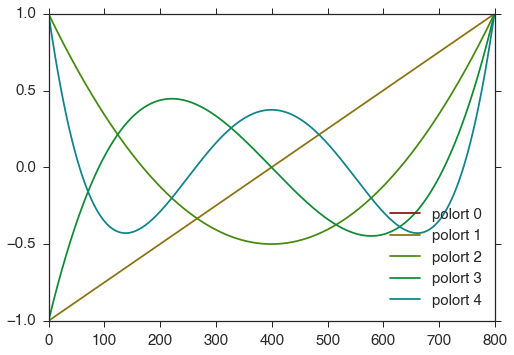

In [76]:
for i in range(1,ncol):
    plot(mat[:,i],'-',label='polort %i'%(i-1))
legend(loc='lower right')

In [77]:
p0 = mat[:,1]
p1 = mat[:,2]
p2 = mat[:,3]

In [78]:
n = 2
a = (2*n-1)/n * p0 * p1
b = (n-1)/n * p0
p2p = a - b

In [79]:
#a

In [80]:
#b

In [81]:
#p2

In [82]:
n = 3
a = (2*n-1)/n * p1 * p2
b = (n-1)/n * p1
p3 = a - b

In [83]:
#a

In [84]:
#a-b

In [85]:
#plot(mat[:,4])
#plot(p3,color='red')

In [86]:
afnimat = np.genfromtxt('nodata.xmat.1D')

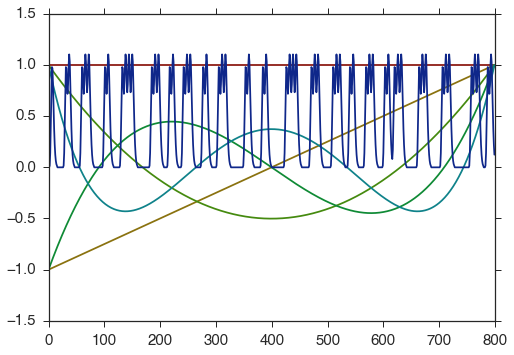

In [87]:
plot(afnimat)

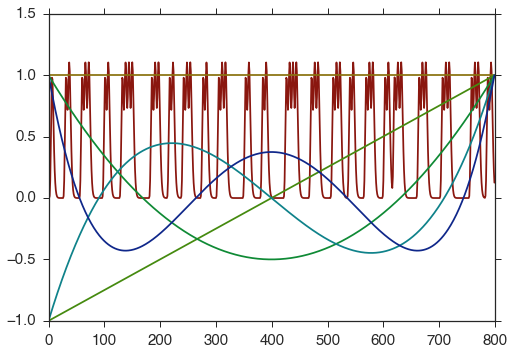

In [88]:
chainseqmat = np.genfromtxt('mat.txt')
plot(chainseqmat)

In [89]:
# Let's look at the history -- exciting!

In [90]:
history = pd.read_csv('history.txt',sep=" ")

In [91]:
history.iloc[:10]

,iteration,n.move.opportunities,n.improving.moves,efficiency,design
0,0,120,74,9.89674,"7.32, 18.3, 25.62, 39.528, 48.312, 58.56, 69.5..."
1,1,118,72,9.92559,"7.32, 18.3, 25.62, 39.528, 48.312, 58.56, 69.5..."
2,2,116,70,9.95416,"7.32, 18.3, 25.62, 39.528, 48.312, 58.56, 69.5..."
3,3,116,70,9.97187,"7.32, 18.3, 25.62, 39.528, 48.312, 58.56, 69.5..."
4,4,114,69,10.00120,"7.32, 18.3, 25.62, 39.528, 48.312, 58.56, 69.5..."
5,5,114,70,10.01150,"7.32, 18.3, 25.62, 39.528, 48.312, 58.56, 69.5..."
6,6,114,70,10.02940,"7.32, 18.3, 25.62, 39.528, 48.312, 58.56, 69.5..."
7,7,112,68,10.05850,"7.32, 18.3, 24.888, 39.528, 48.312, 58.56, 69...."
8,8,112,68,10.06460,"7.32, 18.3, 24.156, 39.528, 48.312, 58.56, 69...."
9,9,112,68,10.07520,"7.32, 18.3, 23.424, 39.528, 48.312, 58.56, 69...."


In [92]:
designs = []
for i,hist in history.iterrows():
    des = [ float(v.strip()) for v in hist["design"].split(",") ]
    designs.append(des)

In [93]:
mat = matrix(designs)
mat.shape

(262, 60)

In [94]:
mat[4,:]

matrix([[   7.32 ,   18.3  ,   25.62 ,   39.528,   48.312,   58.56 ,
           69.54 ,   79.056,   88.572,   96.624,  103.944,  113.46 ,
          125.904,  135.42 ,  143.472,  154.452,  158.844,  172.752,
          177.144,  181.536,  192.516,  202.764,  215.208,  223.26 ,
          234.24 ,  246.684,  258.396,  270.108,  281.088,  294.264,
          305.976,  316.224,  324.276,  334.524,  344.772,  354.288,
          364.536,  373.32 ,  382.104,  390.888,  399.672,  409.188,
          416.508,  423.828,  433.344,  441.396,  449.448,  457.5  ,
          467.748,  478.728,  486.048,  494.1  ,  507.276,  516.792,
          527.04 ,  538.752,  551.196,  559.248,  570.228,  576.084]])

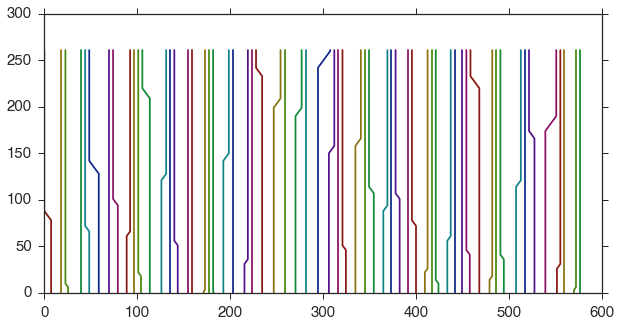

In [96]:
f,axarr=subplots(1,1,figsize=(10,5))
for i in range(mat.shape[1]):
    plot(
         mat[:,i],range(mat.shape[0]),'-')


**Observation**: it seems we only move a trial once in a history. Is that true? I mean, we move the trial various times in a row: we don't return to it later on because other trials have shifted.